In [5]:
import numpy as np
import pandas as pd 

In [6]:
# Part 1 Netflix Movies and Tv Shows
netflix_df = pd.read_csv('netflix_titles.csv')

In [7]:
# Task 2: Display the first 5 and last 5 rows 
print("--- First 5 Rows ---")
print(netflix_df.head())
print("\n--- Last 5 Rows ---")
print(netflix_df.tail())

--- First 5 Rows ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septe

In [8]:
#  Task 3: How many rows and columns are there? 
print(f"\nNumber of rows and columns: {netflix_df.shape}")


Number of rows and columns: (8807, 12)


In [9]:
 #  Task 4: Identify the number of unique countries 
unique_countries = netflix_df['country'].dropna().str.split(', ').explode().nunique()
print(f"\nNumber of unique countries where content is produced: {unique_countries}")


Number of unique countries where content is produced: 127


In [10]:
# Task 5: Display all records where the type is 'TV Show' 
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show']
print("\n--- Records for TV Shows ---")
print(tv_shows_df.head()) 


--- Records for TV Shows ---
  show_id     type                  title         director  \
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           NaN   
3                                                NaN           NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...           NaN   

           date_added  release_year rating   duration  \
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  Se

In [11]:
# Task 6: Convert 'date_added' to datetime and extract year and month 
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['added_year'] = netflix_df['date_added'].dt.year
netflix_df['added_month'] = netflix_df['date_added'].dt.month
print("\n--- Dataframe with Year and Month from date_added ---")
print(netflix_df[['title', 'date_added', 'added_year', 'added_month']].head())


--- Dataframe with Year and Month from date_added ---
                   title date_added  added_year  added_month
0   Dick Johnson Is Dead 2021-09-25      2021.0          9.0
1          Blood & Water 2021-09-24      2021.0          9.0
2              Ganglands 2021-09-24      2021.0          9.0
3  Jailbirds New Orleans 2021-09-24      2021.0          9.0
4           Kota Factory 2021-09-24      2021.0          9.0


In [12]:
 # Task 7: How many movies were released in 2019? 
movies_in_2019 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['release_year'] == 2019)]
count_movies_2019 = len(movies_in_2019)
print(f"\nNumber of movies released in 2019: {count_movies_2019}")


Number of movies released in 2019: 633


In [13]:
 # Task 8: Group by rating and show the count of each category
rating_counts = netflix_df.groupby('rating').size().reset_index(name='count')
print("\n--- Content Count by Rating ---")
print(rating_counts)


--- Content Count by Rating ---
      rating  count
0     66 min      1
1     74 min      1
2     84 min      1
3          G     41
4      NC-17      3
5         NR     80
6         PG    287
7      PG-13    490
8          R    799
9      TV-14   2160
10      TV-G    220
11     TV-MA   3207
12     TV-PG    863
13      TV-Y    307
14     TV-Y7    334
15  TV-Y7-FV      6
16        UR      3


In [14]:
#Part 2 World Population Data
world_pop_df = pd.read_csv('world_population.csv')

In [15]:
# Task 1
print("--- Top 10 Rows of World Population Dataset ---")
print(world_pop_df.head(10))

--- Top 10 Rows of World Population Dataset ---
   Rank CCA3    Country/Territory           Capital      Continent  \
0    36  AFG          Afghanistan             Kabul           Asia   
1   138  ALB              Albania            Tirana         Europe   
2    34  DZA              Algeria           Algiers         Africa   
3   213  ASM       American Samoa         Pago Pago        Oceania   
4   203  AND              Andorra  Andorra la Vella         Europe   
5    42  AGO               Angola            Luanda         Africa   
6   224  AIA             Anguilla        The Valley  North America   
7   201  ATG  Antigua and Barbuda      Saint John’s  North America   
8    33  ARG            Argentina      Buenos Aires  South America   
9   140  ARM              Armenia           Yerevan           Asia   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771         38972230         33753499         28189672   
1          2842321          2866849

In [16]:
#Task 2: Check for null values and handle them appropriately 
print("\n--- Null Values Check ---")
print(world_pop_df.isnull().sum())
   
for col in world_pop_df.select_dtypes(include='number').columns:
    world_pop_df[col] = world_pop_df[col].fillna(world_pop_df[col].mean())
print("\n--- Null values after handling ---")
print(world_pop_df.isnull().sum())


--- Null Values Check ---
Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

--- Null values after handling ---
Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0


In [17]:
 #  Task 3: What is the population of the top 5 most populous countries? 
top_5_populous = world_pop_df.sort_values(by='2022 Population', ascending=False).head(5)
print("\n--- Top 5 Most Populous Countries ---")
print(top_5_populous[['Country/Territory', '2022 Population']])


--- Top 5 Most Populous Countries ---
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


In [18]:
 #  Task 4: Create a new column showing GDP per capita 
    
if 'GDP' in world_pop_df.columns and '2022 Population' in world_pop_df.columns:
        world_pop_df['GDP per Capita'] = world_pop_df['GDP'] / world_pop_df['2022 Population']
        print("\n--- DataFrame with GDP per Capita ---")
        print(world_pop_df[['Country/Territory', 'GDP per Capita']].head())
else:
        print("\nNote: GDP column not found. Skipping Task 4.")


Note: GDP column not found. Skipping Task 4.


In [19]:
# Task 5: Filter out countries with population > 100 million and area < 500,000 sq km 
    filtered_countries = world_pop_df[
        (world_pop_df['2022 Population'] > 100000000) &
        (world_pop_df['Area (km²)'] < 500000)
    ]
    print("\n--- Countries with Population > 100M and Area < 500k sq km ---")
    print(filtered_countries[['Country/Territory', '2022 Population', 'Area (km²)']])


--- Countries with Population > 100M and Area < 500k sq km ---
    Country/Territory  2022 Population  Area (km²)
16         Bangladesh        171186372      147570
102             Japan        123951692      377930
163       Philippines        115559009      342353


In [20]:
 #  Task 6: Sort the countries based on density in descending order 
sorted_by_density = world_pop_df.sort_values(by='Density (per km²)', ascending=False)
print("\n--- Countries Sorted by Density (Descending) ---")
print(sorted_by_density[['Country/Territory', 'Density (per km²)']].head())


--- Countries Sorted by Density (Descending) ---
    Country/Territory  Density (per km²)
119             Macau         23172.2667
134            Monaco         18234.5000
187         Singapore          8416.4634
89          Hong Kong          6783.3922
76          Gibraltar          5441.5000


In [21]:
#Part 3 Indian Premier League(IPL) 

In [22]:
# Task 1: Load the matches.csv file ---
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')
print("--- Top 5 rows of matches.csv ---")
print(matches_df.head())

--- Top 5 rows of matches.csv ---
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winne

In [23]:
 # Task 2: Find out the most successful team (based on number of wins)
most_successful_team = matches_df['winner'].value_counts().idxmax()
win_counts = matches_df['winner'].value_counts()
print(f"\nMost successful team is: {most_successful_team}")
print("\n--- Team Win Counts ---")
print(win_counts)


Most successful team is: Mumbai Indians

--- Team Win Counts ---
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


In [24]:
# --- Task 3: Count total matches played each season 
if 'season' in matches_df.columns:
    matches_per_season = matches_df['season'].value_counts().sort_index()
    print("\n--- Total Matches Played Each Season ---")
    print(matches_per_season)
elif 'date' in matches_df.columns:
    matches_df['season'] = pd.to_datetime(matches_df['date']).dt.year
    matches_per_season = matches_df['season'].value_counts().sort_index()
    print("\n--- Total Matches Played Each Season (extracted from date) ---")
    print(matches_per_season)


--- Total Matches Played Each Season ---
season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64


In [25]:
#  Task 4: Display the top 5 players who won the most "Player of the Match" awards 
top_5_pom = matches_df['player_of_match'].value_counts().head(5)
print("\n--- Top 5 Player of the Match Winners ---")
print(top_5_pom)


--- Top 5 Player of the Match Winners ---
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
Name: count, dtype: int64


In [26]:
# Task 5: Merge matches.csv and deliveries.csv on match_id and perform analysis 
merged_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')
print("\n--- Merged DataFrame (matches and deliveries) Info ---")
merged_df.info()


--- Merged DataFrame (matches and deliveries) Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_ki

In [27]:
#Part 4 Students Performance

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
students_df = pd.read_csv('StudentsPerformance.csv')
print("--- Dataset Info ---")
students_df.info()
print("\n--- First 5 Rows ---")
print(students_df.head())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

--- First 5 Rows ---
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        grou

In [30]:
# Task 1: Display average marks in math, reading, and writing 
avg_math = students_df['math score'].mean()
avg_reading = students_df['reading score'].mean()
avg_writing = students_df['writing score'].mean()
print(f"\nAverage Math Score: {avg_math:.2f}")
print(f"Average Reading Score: {avg_reading:.2f}")
print(f"Average Writing Score: {avg_writing:.2f}")


Average Math Score: 66.09
Average Reading Score: 69.17
Average Writing Score: 68.05


In [31]:
 #Task 2: Who performed better in writing, males or females? 
avg_writing_by_gender = students_df.groupby('gender')['writing score'].mean()
print("\n--- Average Writing Score by Gender ---")
print(avg_writing_by_gender)
if avg_writing_by_gender['female'] > avg_writing_by_gender['male']:
        print("Females performed better in writing on average.")
else:
        print("Males performed better in writing on average.")


--- Average Writing Score by Gender ---
gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64
Females performed better in writing on average.


In [32]:
# Task 3: Add a new column for total score and percentage 
    students_df['total score'] = students_df['math score'] + students_df['reading score'] + students_df['writing score']
    students_df['percentage'] = (students_df['total score'] / 300) * 100
    print("\n--- DataFrame with Total Score and Percentage ---")
    print(students_df[['gender', 'math score', 'reading score', 'writing score', 'total score', 'percentage']].head())


--- DataFrame with Total Score and Percentage ---
   gender  math score  reading score  writing score  total score  percentage
0  female          72             72             74          218   72.666667
1  female          69             90             88          247   82.333333
2  female          90             95             93          278   92.666667
3    male          47             57             44          148   49.333333
4    male          76             78             75          229   76.333333



--- Generating plot for Task 4. Please check the plot window. ---


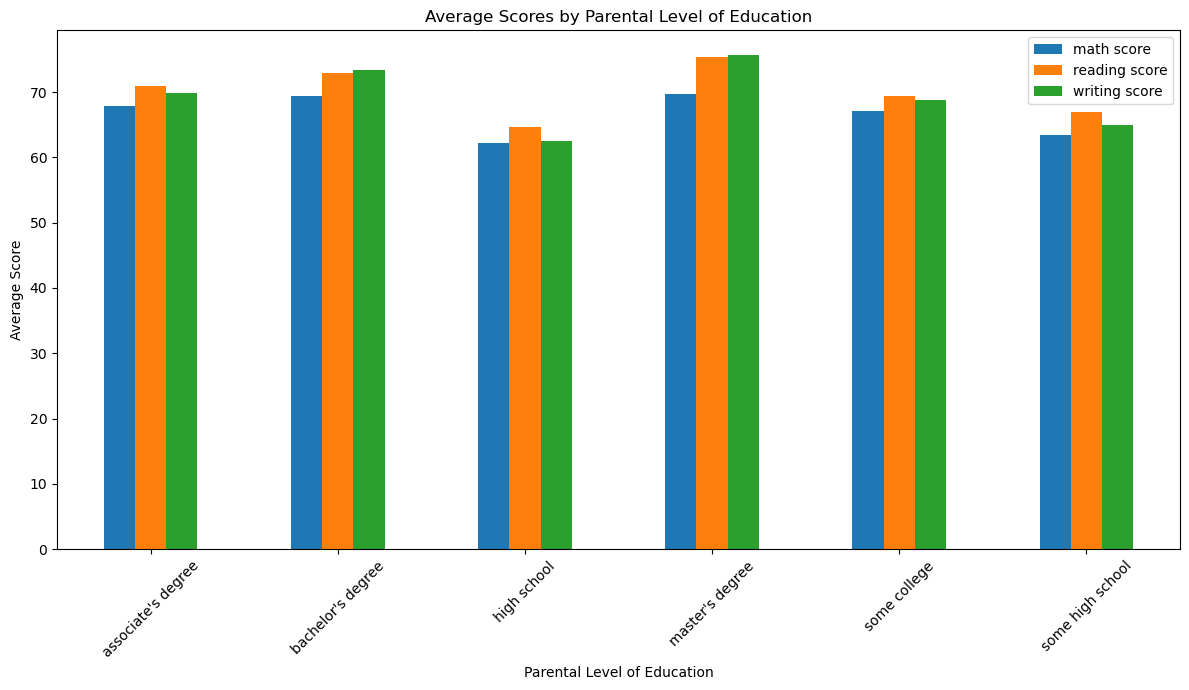

In [33]:
# Task 4: Plot a bar chart showing average scores grouped by parental level of education
parental_ed_scores = students_df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
parental_ed_scores.plot(kind='bar', figsize=(12, 7))
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.tight_layout()
print("\n--- Generating plot for Task 4. Please check the plot window. ---")
plt.show()

In [34]:
#  Task 5: Find students who scored above 90% in all subjects 
   
high_achievers = students_df[
    (students_df['math score'] > 90) &
    (students_df['reading score'] > 90) &
    (students_df['writing score'] > 90)
    ]
print("\n--- Students Who Scored Above 90 in All Subjects ---")
print(high_achievers)


--- Students Who Scored Above 90 in All Subjects ---
     gender race/ethnicity parental level of education         lunch  \
114  female        group E           bachelor's degree      standard   
149    male        group E          associate's degree  free/reduced   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
546  female        group A            some high school      standard   
566  female        group E           bachelor's degree  free/reduced   
571    male        group A           bachelor's degree      standard   
594  female        group C           bachelor's degree      standard   
625    male        group D                some college      standard   
685  female        group E             master's degree      standard   
712  femal

In [35]:
# Part 5 Flight Price Prediction

In [39]:
# Task 1
flights = pd.read_csv("flight_data.csv")  # Adjust path
flights.info()
flights.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
# Task 2: Convert date/time columns to appropriate datetime format 
flights['duration'] = pd.to_datetime(flights['duration'], format='%d/%m/%Y')
#flights['days_left'] = flights['days_left'].dt.day
#flights['Journey_Month'] = flights['Date_of_Journey'].dt.month
flights.head()

In [46]:
 # Task 3: # Most frequent airline and source
flights['airline'].mode()[0], flights['source_city'].mode()[0]


('Vistara', 'Delhi')

In [47]:
# Remove duplicates and handle missing
flights.drop_duplicates(inplace=True)
flights.dropna(inplace=True)
flights.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64